In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('insurance.csv')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

## There are no missing values  

In [7]:
df.shape

(1338, 7)

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [15]:
df['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [16]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [28]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

## Now Data Analysis and Visualization 

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


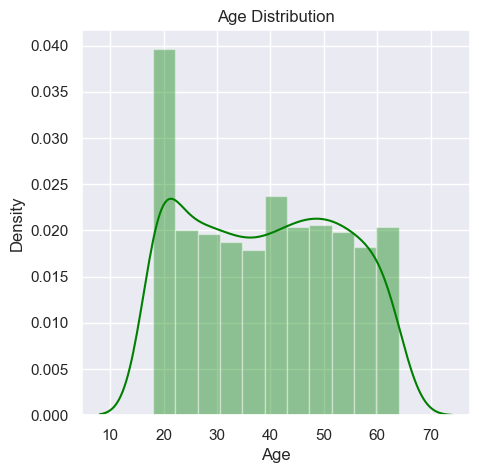

In [21]:
sns.set()
plt.figure(figsize=(5, 5))
sns.distplot(df['age'], color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

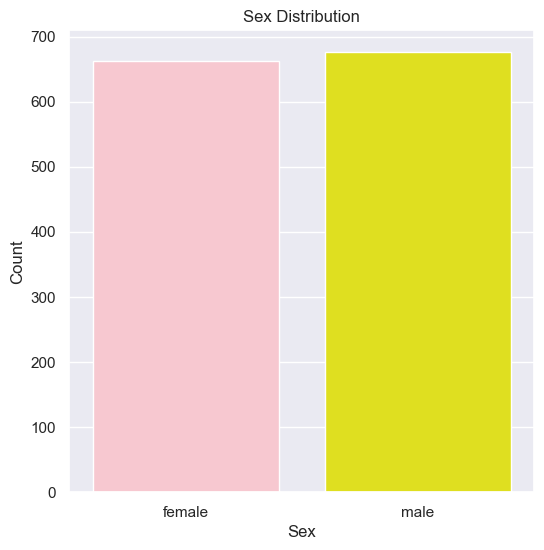

In [25]:
sns.set()
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df, palette=['pink', 'yellow'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

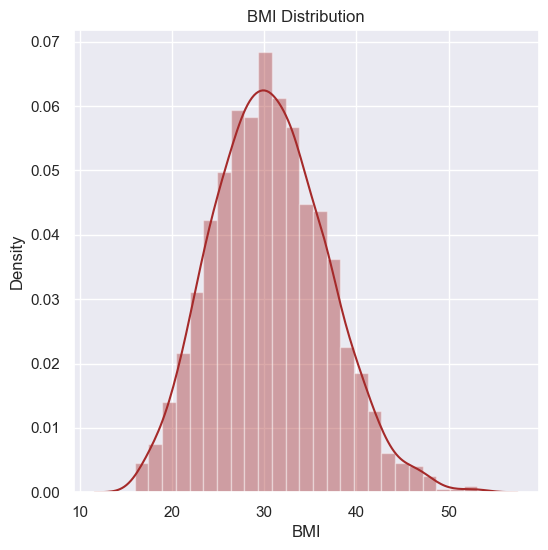

In [26]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(df['bmi'], color='brown')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

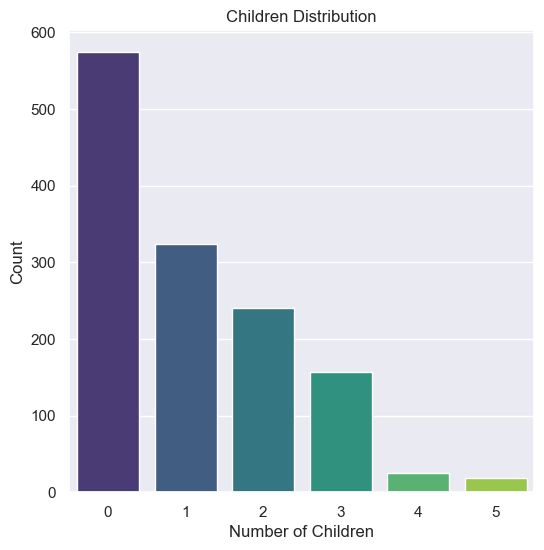

In [27]:
sns.set()
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=df, palette='viridis')
plt.title('Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

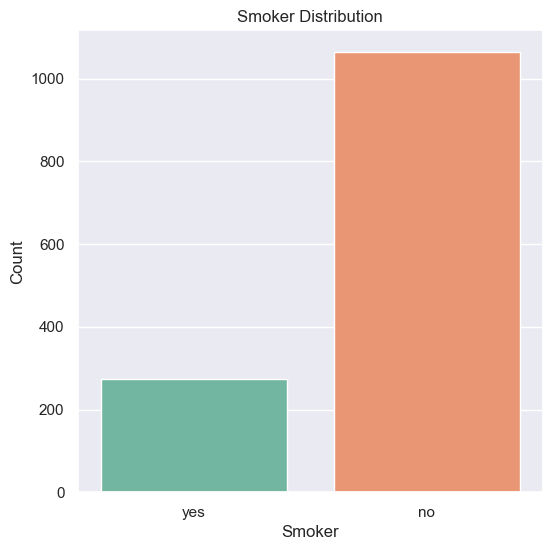

In [29]:
sns.set()
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=df, palette='Set2')
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

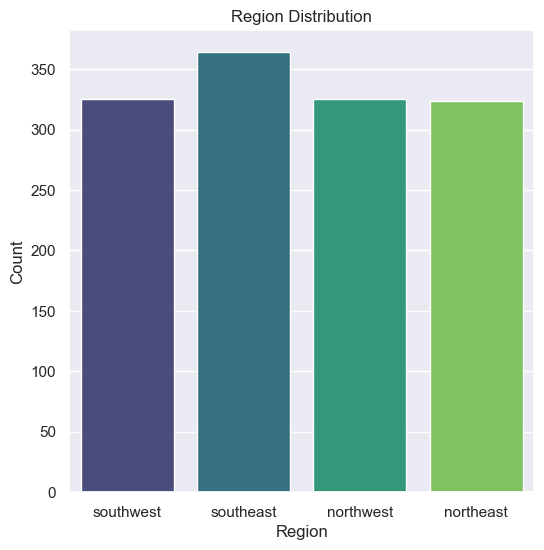

In [30]:
sns.set()
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=df, palette='viridis')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

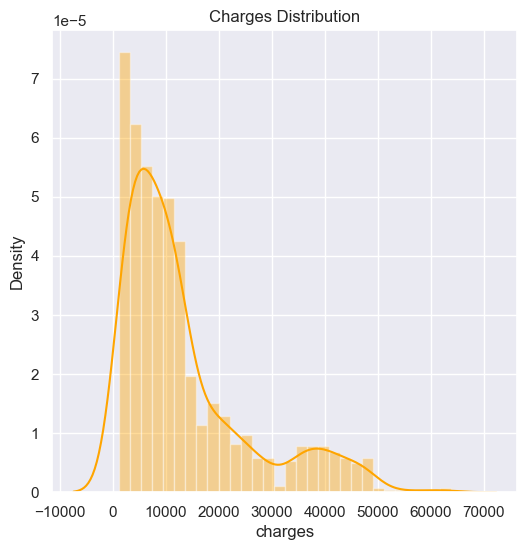

In [31]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(df['charges'], color='orange')
plt.title('Charges Distribution')
plt.show()

### From the above graphs, we can deduce the below facts.

1. Insurance costs are higher among male population

2. Insurance costs are highest among the population of age groups 60-69.

3. Insurance costs increases among the smokers

4. Insurance costs increases among the obese population

5. Insurance costs are higher among the population in southwest region


Surprisingly, insurance costs are higher among the individuals with 2 or 3 children rather than with individuals with 4 or 5 children. 

## Converting Categorical Data Into Numerical Data 

In [45]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [46]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


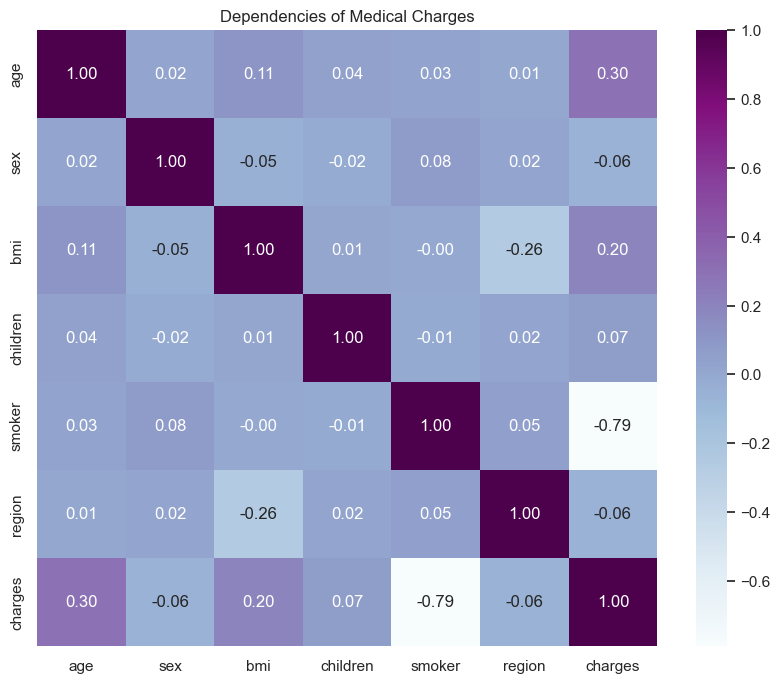

In [48]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='BuPu', annot=True, fmt=".2f")
plt.title("Dependencies of Medical Charges")
plt.show()

### Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

In [50]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [51]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [52]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Splitting the data into Training data & Testing Data

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Modal Training and Evaluation


### Linear Regression 

In [54]:
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

In [60]:
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.751505643411174


In [61]:
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684077


### Cost Analysis 

In [68]:
target = df['charges']
features = df.drop(['age', 'bmi', 'charges'], axis=1)
min_cost = np.min(target)
max_cost = np.max(target)
mean_cost = np.mean(target)
median_cost = np.median(target)
std_cost = np.std(target)

print (target.describe())
print ('-'*60)
# calculated statistics
print ("Statistics for Medical Insurance:\n")
print ("Minimum insurance cost: Rs.{:,.2f}".format(min_cost))
print ("Maximum insurance acost: Rs.{:,.2f}".format(max_cost))
print ("Mean insurance cost: Rs.{:,.2f}".format(mean_cost))
print ("Median insurance cost Rs.{:,.2f}".format(median_cost))
print ("Standard deviation of insurance costs: Rs.{:,.2f}".format(std_cost))

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
------------------------------------------------------------
Statistics for Medical Insurance:

Minimum insurance cost: Rs.1,121.87
Maximum insurance acost: Rs.63,770.43
Mean insurance cost: Rs.13,270.42
Median insurance cost Rs.9,382.03
Standard deviation of insurance costs: Rs.12,105.48
